# Estadísticas Móviles 
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [2]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import glob

### Leer ficheros csv:

In [3]:
path =r'../data/'

allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

datos = pd.concat(list_, axis = 0, ignore_index = True)

print(len(datos))
datos.head()

4482399


,MAC_NGMATT,UUID_BSN,Date,Time,P1,P2,P3,P4,P5,P6,...,P10,P11,P12,HR,RR,SV,HRV,SS,B2B,STATUS
0,886B0F59968A,NaN,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,886B0F59968A,NaN,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,886B0F59968A,NaN,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,886B0F59968A,NaN,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,886B0F59968A,NaN,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Filtrar datos temporales y datos de presión: 

In [4]:
datos2 = datos.iloc[:,2:16]
datos2.head()

,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0


### Eliminar filas incompletas: 

In [5]:
datos3 = datos2.dropna()
print(len(datos3))
datos3.head()

4482391


,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
0,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0


### Estadisticas móviles: 
- #### Media móvil: 

In [6]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    description='ventana:',
    readout=True,
    readout_format='d'
)
display(slider)

IntSlider(value=5, description='ventana:', max=20, min=1)

In [7]:
ventanaMedia = slider.value

datosEstadisticos = datos3.copy()
for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    datosEstadisticos[nombre_col_mean] = datosEstadisticos[nombre_col].rolling(ventanaMedia).mean()

datosEstadisticos.head()

,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,...,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,P11 mean,P12 mean
0,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,...,28.2,22.6,2.2,0.0,1.4,0.0,0.0,0.0,0.6,0.0


- #### Desviación móvil:  

In [8]:
ventanaDesviacion = ventanaMedia

for i in range(1,13):
    nombre_col = 'P'+str(i)
    nombre_col_std = nombre_col+' std'
    datosEstadisticos[nombre_col_std] = datosEstadisticos[nombre_col].rolling(ventanaDesviacion).std()

datosEstadisticos.head()

,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
0,2018-10-30,21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-30,21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-30,21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-30,21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,...,0.83666,0.547723,1.095445,0.0,0.894427,0.0,0.0,0.0,0.547723,0.0


### Eliminar filas sin datos estadisticos: 

In [9]:
datosEstadisticos = datosEstadisticos.dropna()
print(len(datosEstadisticos))
datosEstadisticos.head()

4482387


,Date,Time,P1,P2,P3,P4,P5,P6,P7,P8,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
4,2018-10-30,21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,...,0.836660,0.547723,1.095445,0.0,0.894427,0.0,0.0,0.0,0.547723,0.0
5,2018-10-30,21:20:25,4.0,25.0,28.0,23.0,2.0,0.0,1.0,0.0,...,0.707107,0.547723,1.000000,0.0,0.836660,0.0,0.0,0.0,0.547723,0.0
6,2018-10-30,21:20:26,2.0,25.0,27.0,22.0,1.0,0.0,1.0,0.0,...,0.836660,0.547723,1.000000,0.0,0.836660,0.0,0.0,0.0,0.547723,0.0
7,2018-10-30,21:20:27,2.0,25.0,27.0,22.0,2.0,0.0,1.0,0.0,...,0.836660,0.547723,0.836660,0.0,0.547723,0.0,0.0,0.0,0.547723,0.0
8,2018-10-30,21:20:28,3.0,25.0,27.0,22.0,2.0,0.0,0.0,0.0,...,0.894427,0.547723,0.707107,0.0,0.707107,0.0,0.0,0.0,0.547723,0.0


### Representar datos: 

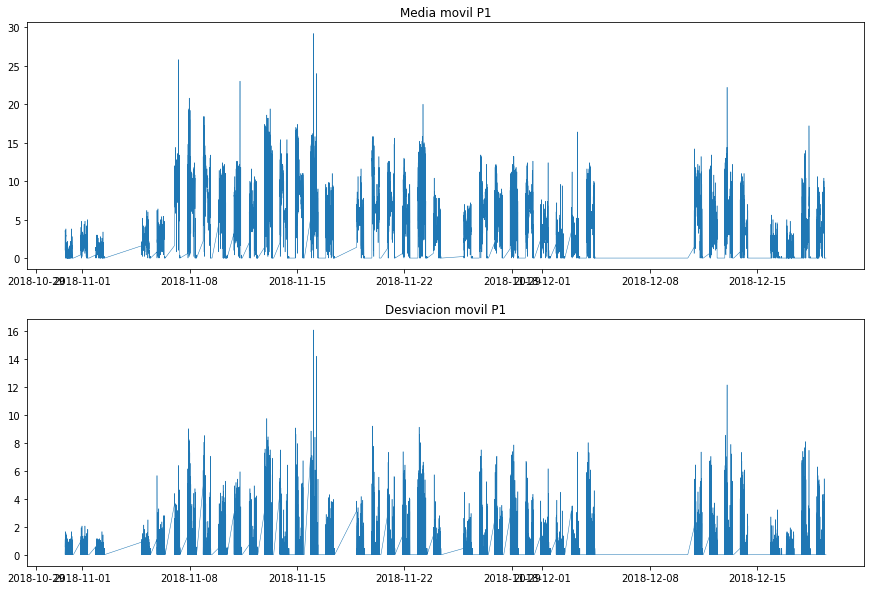

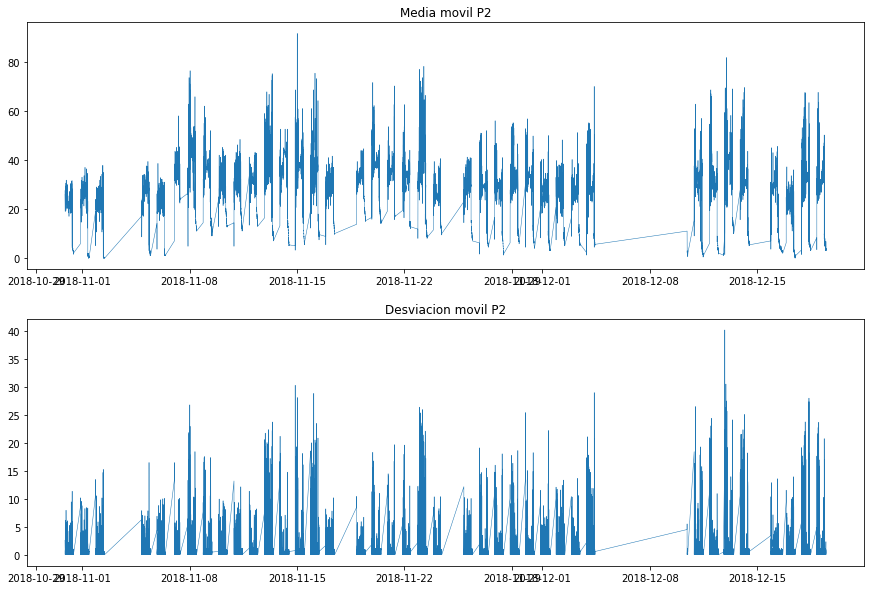

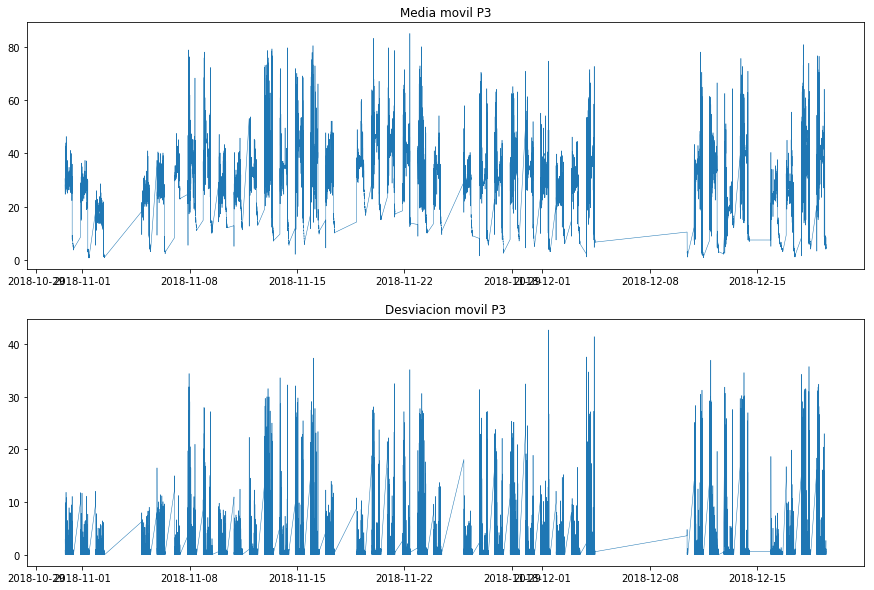

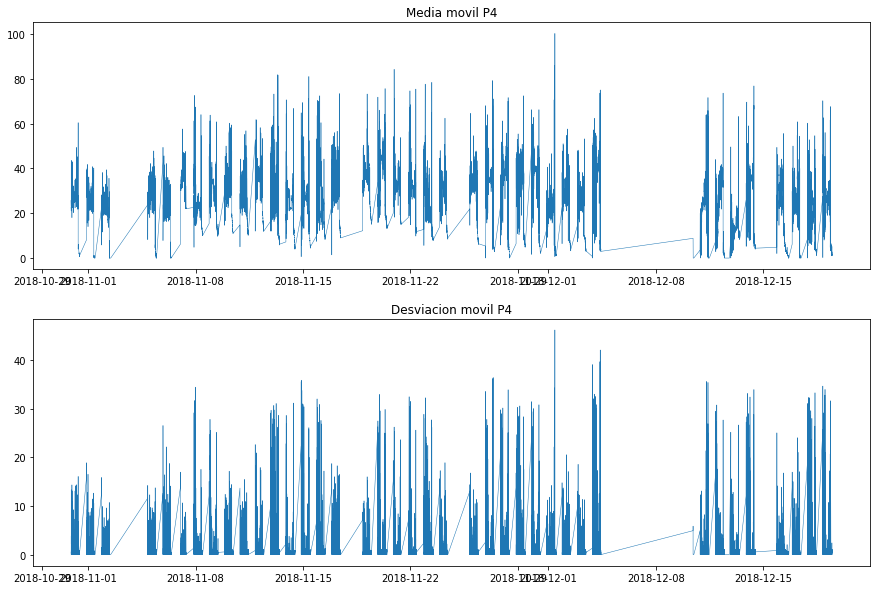

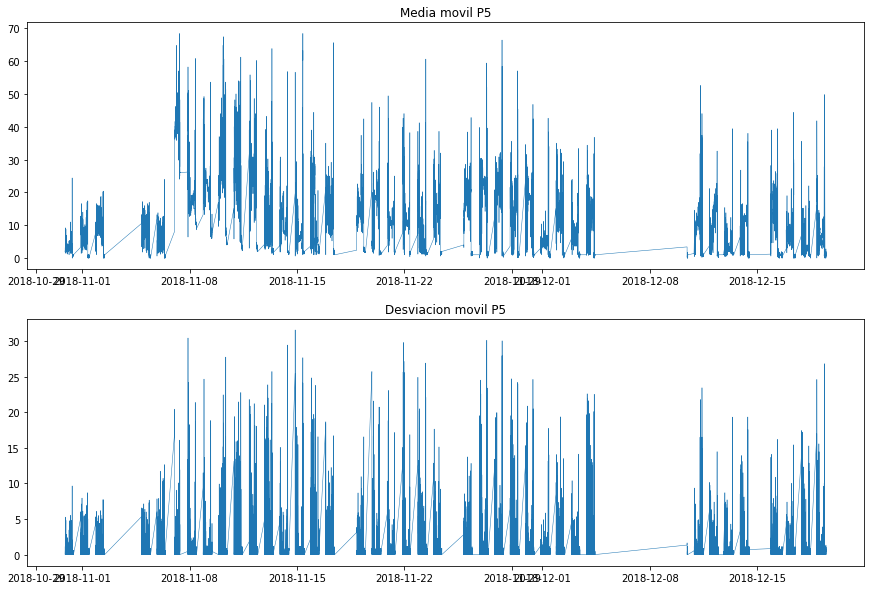

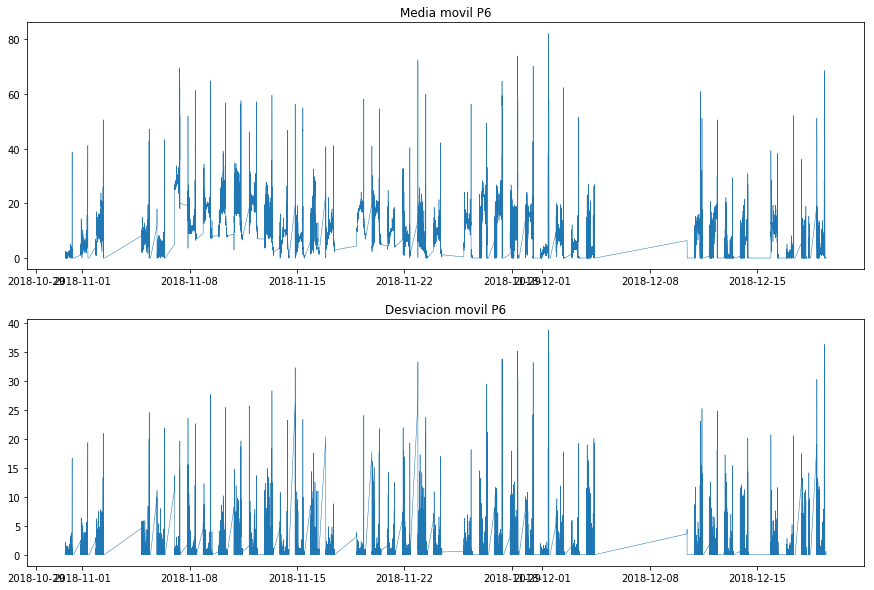

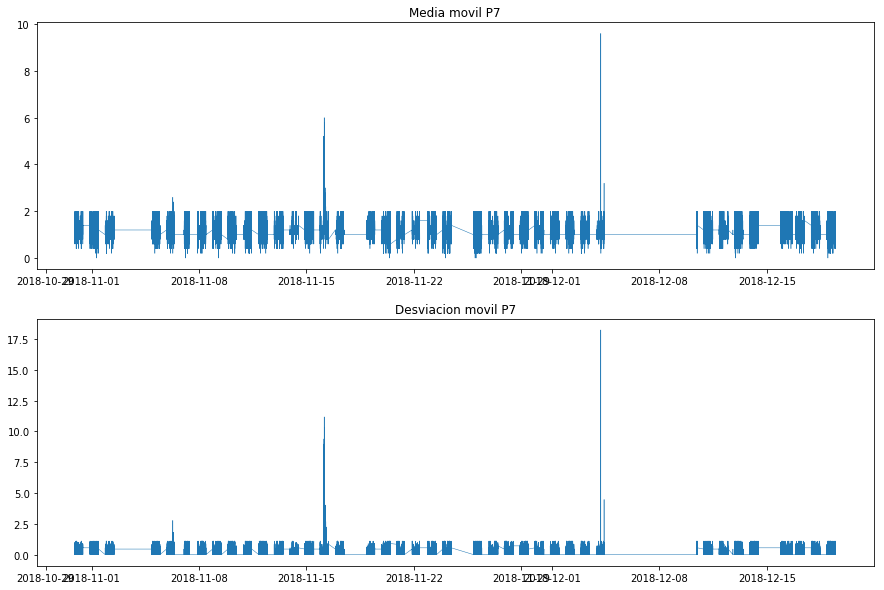

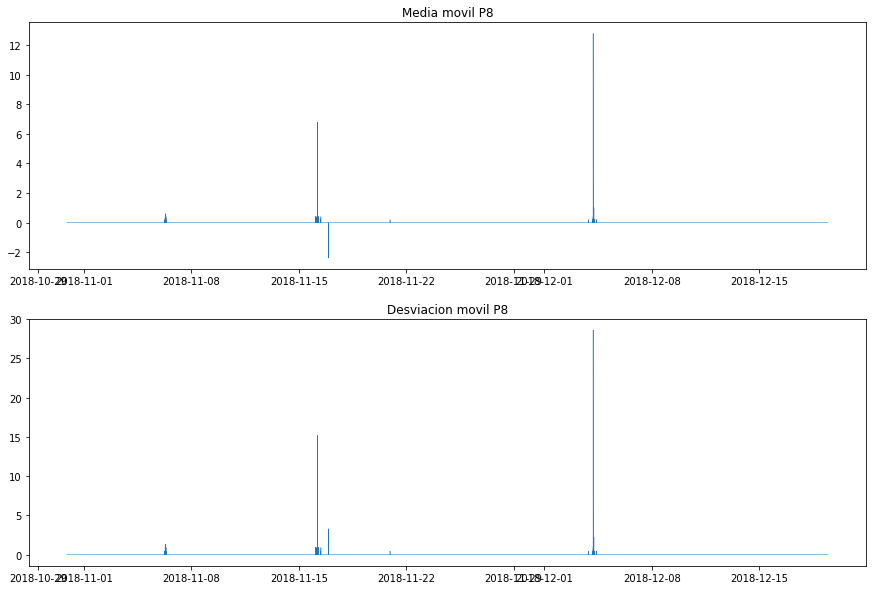

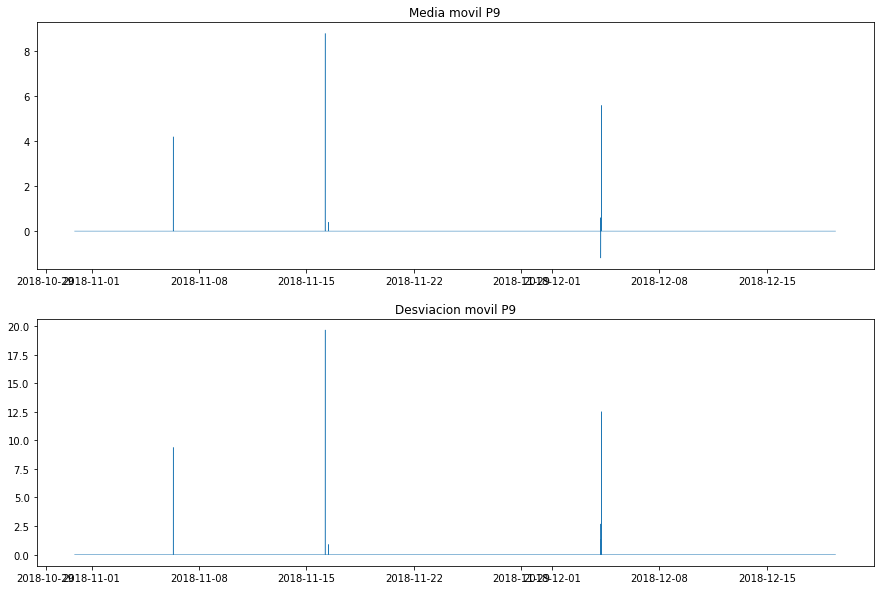

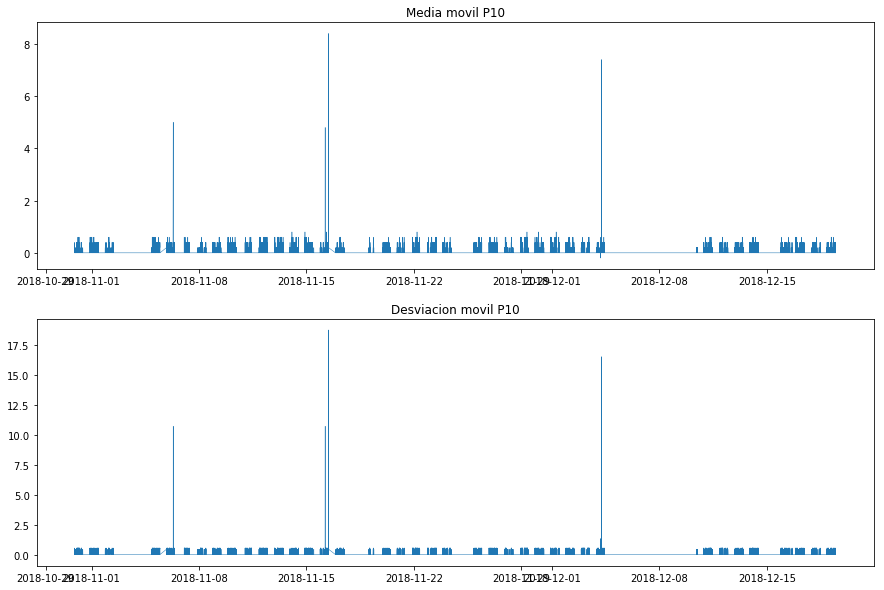

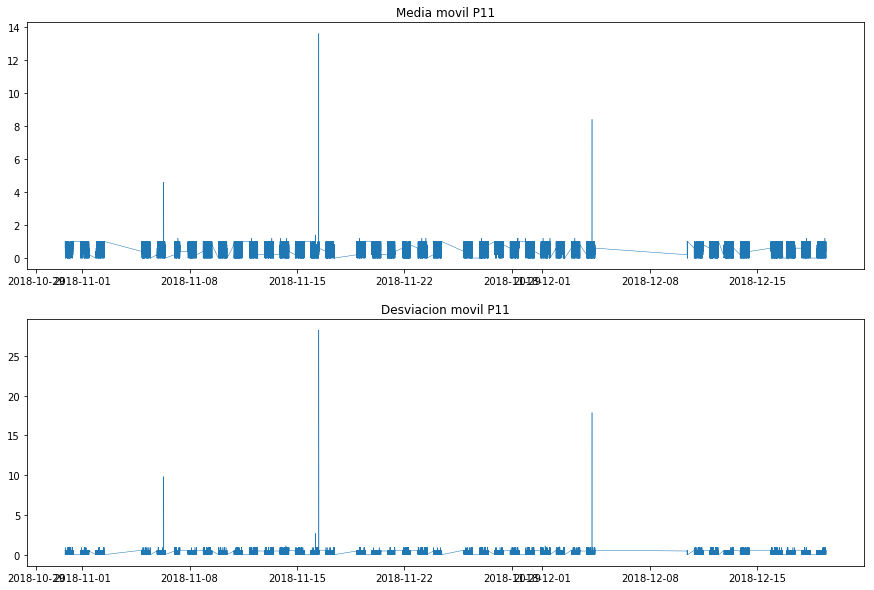

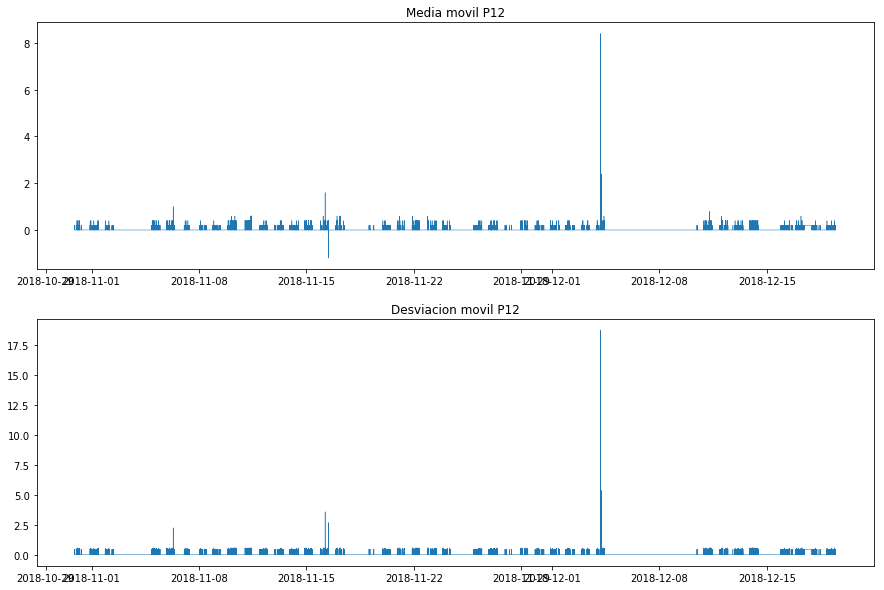

In [17]:
lw=0.5 #grosor de línea 

date = datosEstadisticos['Date']
time = datosEstadisticos['Time']
datetime = date+" "+time
datosEstadisticos['DateTime'] = pd.to_datetime(datetime)

#ordenar por fecha 
datosEstadisticos.sort_values(by='DateTime')
date_time = np.transpose(datosEstadisticos['DateTime'])

for i in range(1,13):  
    nombre_col = 'P'+str(i)
    nombre_col_mean = nombre_col+' mean'
    nombre_col_std = nombre_col+' std'
    dato_mean = np.transpose(datosEstadisticos[nombre_col_mean])
    dato_std = np.transpose(datosEstadisticos[nombre_col_std])

    plt.figure(figsize=(15,10))
    plt.subplot(211)
    plt.plot(date_time, dato_mean, linewidth=lw)
    plt.title("Media movil "+nombre_col)
    plt.subplot(212)
    plt.plot(date_time, dato_std, linewidth=lw)
    plt.title("Desviacion movil "+nombre_col)